In [1]:
## creates figure 1 of the LVDB overview paper 
## cumulative distribution of MW, M31, Local Field, and ambiguous (Ultra-faint compact stellar systems) based on discovery year


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.table as table

import yaml

In [3]:
## make good looking plots
plt.style.use('https://raw.githubusercontent.com/apace7/local_volume_database/main/code/std.mplstyle')
import matplotlib as mp
mp.rcParams['text.usetex'] = True

In [4]:
## consistent labels and colors
color_dsph_mw = 'tab:blue'
color_dsph_m31 = 'tab:orange'
color_dsph_lf = 'tab:green'
color_dsph_lf_distant = 'tab:red'

color_gc_disk = 'tab:purple'
color_gc_harris = 'tab:brown'
color_gc_ufcss = 'tab:olive'

color_gc_dwarf = 'tab:pink'
color_gc_lmc_smc = 'tab:grey'

label_dsph_mw = r'${\rm MW~Satellite}$'
label_dsph_m31 = r'${\rm M31~Satellite}$'
label_dsph_lf = r'${\rm Local~Field/Isolated}$'
label_dsph_lf_distant = r'${\rm Dwarf~Distant}$'
label_gc_ufcss = r'${\rm Ambiguous/UFCSS}$'
label_gc_harris = r'${\rm GC~Harris}$'
label_gc_disk =r'${\rm GC~New~Disk}$'
label_gc_lmc_smc =r'${\rm GC~LMC/SMC}$'
label_gc_dwarf =r'${\rm GC~Dwarf}$'

In [5]:
## load latest files from github
dsph_mw = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_mw.csv')
dsph_m31 = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_m31.csv')
dsph_lf = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/dwarf_local_field.csv')
gc_ufsc = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_ufsc.csv')
gc_disk = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_disk.csv')
gc_harris = table.Table.read('https://raw.githubusercontent.com/apace7/local_volume_database/main/data/gc_harris.csv')


In [6]:
# path = '/Users/apace/Documents/local_volume_database/data_input/'
path = '../data_input/'

In [7]:
## add year to main catalog

def add_year(table):
    table['year'] = np.zeros(len(table), dtype=int)

    for i in range(len(table)):
        k = table['key'][i]
        with open(path+ k +'.yaml', 'r') as stream:
            try:
                stream_yaml = yaml.load(stream, Loader=yaml.Loader)

                if 'discovery_year' in stream_yaml['name_discovery'].keys():
                    table['year'][i] = stream_yaml['name_discovery']['discovery_year']
                # else:
                #     print(stream_yaml['key'], "discovery_year")
            except yaml.YAMLError as exc:
                print(exc)
    return table['year']

In [8]:
dsph_mw['year'] = add_year(dsph_mw)
dsph_m31['year'] = add_year(dsph_m31)
dsph_lf['year'] = add_year(dsph_lf)

gc_ufsc['year'] = add_year(gc_ufsc)
gc_disk['year'] = add_year(gc_disk)
gc_harris['year'] = add_year(gc_harris)


In [9]:
gc_ufsc_extra = gc_ufsc[np.logical_or.reduce((gc_ufsc['key']=='draco_2', gc_ufsc['key']=='sagittarius_2', gc_ufsc['key']=='eridanus_3', gc_ufsc['key']=='delve_2', gc_ufsc['key']=='delve_1', gc_ufsc['key']=='crater_1'))]
len(gc_ufsc_extra)
## systems that have been (initally) thought to be dwarf galaxies and/or may be dwarf galaxies
## draco_2 is now in the dwarf galaxy table

5

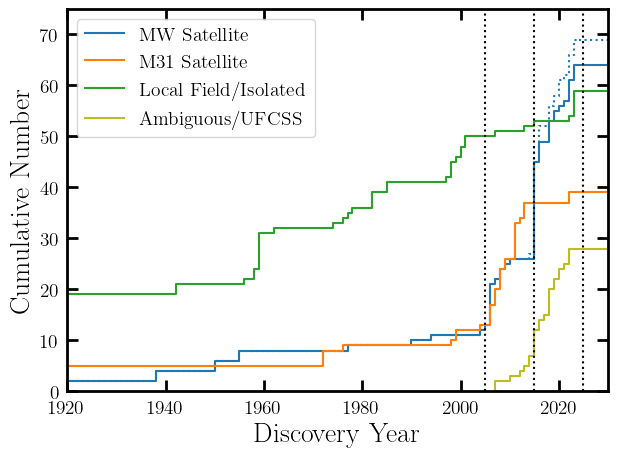

In [10]:
## this sorts the data and makes the cumlative step function

sorted_data = np.sort(np.concatenate([dsph_mw['year'], gc_ufsc_extra['year']])) 
# print(len(sorted_data))
plt.step(sorted_data, np.arange(sorted_data.size), c=color_dsph_mw, ls=':')  
## add line to larger year
plt.plot( [np.max(sorted_data), np.max(sorted_data)+100], [len(sorted_data)-1, len(sorted_data)-1], c=color_dsph_mw, ls=':')

sorted_data = np.sort(dsph_mw['year']) 
plt.step(sorted_data, np.arange(sorted_data.size), where='pre' , c=color_dsph_mw, label=label_dsph_mw)
plt.plot( [np.max(sorted_data), np.max(sorted_data)+100], [len(sorted_data)-1, len(sorted_data)-1], c=color_dsph_mw)

sorted_data = np.sort(dsph_m31['year']) 
plt.step(sorted_data, np.arange(sorted_data.size), where='pre', c=color_dsph_m31, label=label_dsph_m31)
plt.plot( [np.max(sorted_data), np.max(sorted_data)+100], [len(sorted_data)-1, len(sorted_data)-1], c=color_dsph_m31)

sorted_data = np.sort(dsph_lf['year']) 
plt.step(sorted_data, np.arange(sorted_data.size), where='pre' , c=color_dsph_lf, label=label_dsph_lf)
plt.plot( [np.max(sorted_data), np.max(sorted_data)+100], [len(sorted_data)-1, len(sorted_data)-1], c=color_dsph_lf)

sorted_data = np.sort(gc_ufsc['year']) 
plt.step(sorted_data, np.arange(sorted_data.size), where='pre' , c=color_gc_ufcss, label=label_gc_ufcss)
plt.plot( [np.max(sorted_data), np.max(sorted_data)+100], [len(sorted_data)-1, len(sorted_data)-1], c=color_gc_ufcss)

plt.xlim(1920, 2030)
plt.ylim(0, 75)
plt.xlabel(r'${\rm Discovery~Year}$')
plt.ylabel(r'${\rm Cumulative~Number}$')
## add lines denoting eras (SDSS, current, LSST)
plt.axvline(2005, c='k', ls=":", )
plt.axvline(2015, c='k', ls=":", )
plt.axvline(2025, c='k', ls=":", )

plt.legend(loc=2)
plt.tight_layout()
plt.savefig('plots/milky_way_m31_lf_discovery_year.pdf')
plt.show()